In [ ]:
import os
import pandas as pd
from dotenv import load_dotenv
from serpapi import GoogleSearch
import boto3


In [2]:
load_dotenv()

True

#### SerpAPI

In [3]:
SERPAPI_API_KEY = os.environ.get("SERPAPI_API_KEY")

##### GoogleNewsAPI

In [24]:
params = {
  "api_key": SERPAPI_API_KEY,
  "engine": "google_news", # Google News API エンジンを使用する
  "gl": "jp", # Google ニュース検索に使用する国
  "hl": "ja", # Google ニュース検索で使用する言語
  "q": "みずほ" # 検索するクエリ site:, when:なども利用可能
}

search = GoogleSearch(params)
results = search.get_dict()

In [25]:
results['news_results']

[{'position': 1,
  'title': 'みずほ銀行 “行員 貸金庫から数千万円盗む 6年前に懲戒解雇”',
  'source': {'name': 'nhk.or.jp',
   'icon': 'https://encrypted-tbn2.gstatic.com/faviconV2?url=https://www3.nhk.or.jp&client=NEWS_360&size=96&type=FAVICON&fallback_opts=TYPE,SIZE,URL'},
  'link': 'https://www3.nhk.or.jp/news/html/20250218/k10014725661000.html',
  'thumbnail': 'https://www3.nhk.or.jp/news/html/20250218/K10014725661_2502181021_0218103117_01_02.jpg',
  'thumbnail_small': 'https://news.google.com/api/attachments/CC8iK0NnNWhUWGRZVFVWVE1EbGpOMUJvVFJDZkF4ampCU2dLTWdZRmdwQUx0UVk',
  'date': '02/18/2025, 09:31 AM, +0000 UTC'},
 {'position': 2,
  'title': 'みずほ銀行でも貸金庫で窃盗の疑い 数千万円の金品、行員が盗んだか',
  'source': {'name': '朝日新聞',
   'icon': 'https://lh3.googleusercontent.com/tT6StGNayg9ro-wFKJJVE81V1tsYkIa--4sefg6LXsW5JFvnqkQWWgW_0Bvc93U-Job-urfa1zU',
   'authors': ['堀篭俊材', '柴田秀']},
  'link': 'https://www.asahi.com/articles/AST2L0DDHT2LULFA00BM.html',
  'thumbnail': 'https://www.asahicom.jp/imgopt/img/86b152d881/hd640/AS2025021

In [27]:
result = [[item['title'], item['date'], item['link'], item['source']['name']] for item in results["news_results"]]
result

[['みずほ銀行 “行員 貸金庫から数千万円盗む 6年前に懲戒解雇”',
  '02/18/2025, 09:31 AM, +0000 UTC',
  'https://www3.nhk.or.jp/news/html/20250218/k10014725661000.html',
  'nhk.or.jp'],
 ['みずほ銀行でも貸金庫で窃盗の疑い 数千万円の金品、行員が盗んだか',
  '02/18/2025, 01:28 AM, +0000 UTC',
  'https://www.asahi.com/articles/AST2L0DDHT2LULFA00BM.html',
  '朝日新聞'],
 ['みずほ銀行でも貸金庫窃盗 2019年に現金数千万円',
  '02/18/2025, 06:36 AM, +0000 UTC',
  'https://www.nikkei.com/article/DGXZQOUB181360Y5A210C2000000/',
  '日本経済新聞'],
 ['みずほ銀行の貸金庫でも盗難 当時の行員が関与か 数年前に発覚',
  '02/18/2025, 01:20 AM, +0000 UTC',
  'https://mainichi.jp/articles/20250218/k00/00m/040/064000c',
  '毎日新聞'],
 ['みずほ銀で元行員が貸金庫窃盗、2019年に現金数千万円',
  '02/18/2025, 08:24 AM, +0000 UTC',
  'https://jp.reuters.com/markets/japan/funds/DM6MUWCYA5LG5FA4KUKLUM2TDI-2025-02-18/',
  'ロイター (Reuters Japan)'],
 ['みずほ銀行、貸金庫からの盗難可能性を金融庁に報告－関係者',
  '02/17/2025, 11:44 PM, +0000 UTC',
  'https://www.bloomberg.co.jp/news/articles/2025-02-17/SRUM9UT1UM0W00',
  'ブルームバーグ'],
 ['広がる銀行不信 貸金庫窃取、みずほ銀でも：時事ドットコム',
  '02/18/2025, 11:56 AM,

In [ ]:
# 最終的には速度加味してdictでそのまま扱うが、下記はわかりやすさのため
df_google_news = pd.DataFrame(result, columns=["ヘッドライン","日付","URL","情報ソース"])
df_google_news['日付'] = pd.to_datetime(df_google_news['日付'], format='%m/%d/%Y, %I:%M %p, %z UTC')
df_google_news['日付'] = df_google_news['日付'].dt.tz_convert('Asia/Tokyo') # UTCから日本時間に変換（ここは辞書でも考慮しないといけないところ）
df_google_news.head()

,ヘッドライン,日付,URL,情報ソース
0,みずほ銀行 “行員 貸金庫から数千万円盗む 6年前に懲戒解雇”,2025-02-18 18:31:00+09:00,https://www3.nhk.or.jp/news/html/20250218/k100...,nhk.or.jp
1,みずほ銀行でも貸金庫で窃盗の疑い 数千万円の金品、行員が盗んだか,2025-02-18 10:28:00+09:00,https://www.asahi.com/articles/AST2L0DDHT2LULF...,朝日新聞
2,みずほ銀行でも貸金庫窃盗 2019年に現金数千万円,2025-02-18 15:36:00+09:00,https://www.nikkei.com/article/DGXZQOUB181360Y...,日本経済新聞
3,みずほ銀行の貸金庫でも盗難 当時の行員が関与か 数年前に発覚,2025-02-18 10:20:00+09:00,https://mainichi.jp/articles/20250218/k00/00m/...,毎日新聞
4,みずほ銀で元行員が貸金庫窃盗、2019年に現金数千万円,2025-02-18 17:24:00+09:00,https://jp.reuters.com/markets/japan/funds/DM6...,ロイター (Reuters Japan)


In [ ]:
# DynamoDB リソースを取得
dynamodb = boto3.resource('dynamodb')
table = dynamodb.Table('YourTableName')

# バッチ書き込み（上書き）
with table.batch_writer() as batch:
    for item in result:
        title, date, url, source = item
        batch.put_item(
            Item={
                'url': url,
                'title': title,
                'date': date,
                'source': source
            }
        )

##### GoogleFinance

In [12]:
# JSON 出力には、「市場」、「グラフ」、「概要」、「ナレッジ グラフ」、「ニュース結果」、「財務」、「先物チェーン」、および「詳細を表示」の構造化データが含まれます。
# キーイベントの機能もある
# https://serpapi.com/google-finance-api#api-examples-key-events-example-with-q-googl-nasdaq-and-window-1y
params = {
  "api_key": SERPAPI_API_KEY,
  "engine": "google_finance", # Google Finance API エンジンを使用する
  "q": "8306:TYO", # 検索するクエリ
  "hl": "ja", # Google Finance 検索で使用する言語
  # "window": "1y" # データを取得する期間
}

search = GoogleSearch(params)
results = search.get_dict()

In [ ]:
# あまりデータは入っていなさそうだが、面白いデータ（株価が大きく動いた際のキーイベントを取得
results['key_events']

KeyError: 'key_events'

In [ ]:
# 財務指標を取得
pd.DataFrame(results['financials'][1]['results'][0]['table'])

,title,description,value,change
0,現金および短期投資,換金が比較的容易で、3 か月から 1 年の間に満期を迎える投資,153997567000000,0.36%
1,総資産,企業が所有する資産の総額,413193210000000,4.06%
2,負債総額,企業が抱える負債の総計,391570751000000,3.85%
3,純資産,企業の総資産から負債総額を差し引いた金額,21622459000000,8.14%
4,発行済み株式,有価証券報告書で開示された、直近の日付における発行済み普通株式の総数,11600511682,-2.36%
5,帳簿価格,会社の市場価値が、その会社の資産から負債を差し引いた価値と優先株式に合致しているかを判断する...,1.1283566119136246,-9.51%
6,総資産利益率,会社の利益と資産を比較した財務比率です。,0.51%,—
7,資本利益率,会社が支払う負債の平均値と自己資本に対する収益です。,—,—


In [ ]:
# 財務指標を取得
pd.DataFrame(results['knowledge_graph']['key_stats']['stats'])

,label,description,value
0,前日の終値,前日終値,"￥1,982.50"
1,日次変動幅,過去 1 日の最高値と最低値の範囲,"￥1,993.00 - ￥2,032.50"
2,年間変動幅,過去 52 週間の最高値と最低値の範囲,"￥1,200.00 - ￥2,032.50"
3,時価総額,企業の株価を発行済み株式数で掛けてその企業価値を表す評価法,24.40兆 JPY
4,平均取引高,過去 30 日間に取引された株式数の 1 日あたりの平均値,5210.17万
5,株価収益率,過去 12 か月の EPS に対する時価総額の比率であり、価格が他の株式と比べて割高か割安か...,12.20
6,配当利回り,時価総額に対する年間配当の比率であり、株式の配当利益を見積もったもの,2.25%
7,優先市場,この証券の上場取引所,TYO


<Axes: xlabel='date'>

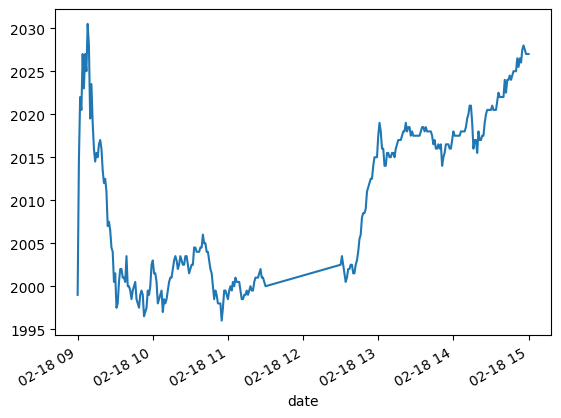

In [19]:
# 株価を取得するサンプル
df_stock_price = pd.DataFrame(results['graph'])
df_stock_price['date'] = pd.to_datetime(df_stock_price['date'], format='%b %d %Y, %I:%M %p UTC%z')
df_stock_price.set_index('date')['price'].plot()